# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [0]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

### Importando bibliotecas

In [2]:
import seaborn as sns
import pandas as pd
import psycopg2

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Usando psycopg2 para configurar conexão

In [0]:
conn = psycopg2.connect(host="raja.db.elephantsql.com",database="tyskgqbu", user="tyskgqbu", password="UBkUEB2KGN3ePpXzPMmGQUcLIztpbWZ2")

## Obtendo dados do database com Pandas

# Relatório 1

### Objetivo: Número total de produtos vendidos por um supermercado


Código para obtenção do resultado:

In [0]:
test = pd.read_sql_query("""
                            select nome, count(mercado_compra_fk) as qnt_compras from supermercado as sup 
                            inner join produto_compra as prod 
                            on (sup.codigo = prod.mercado_compra_fk)
                            group by prod.mercado_compra_fk, nome
                            """,conn)

In [5]:
test

,nome,qnt_compras
0,ExtraBom,24
1,Perim,17
2,Carone,19


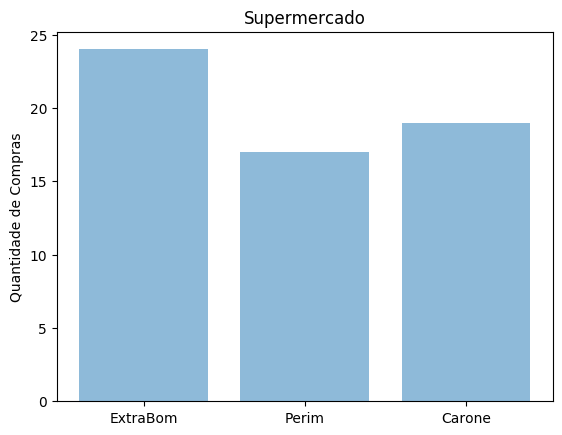

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(test)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)
 
objects = tuple(df.nome)
y_pos = np.arange(len(objects))
performance = list(df.qnt_compras)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de Compras')
plt.title('Supermercado')
 
plt.show()

# Relatorio2

### Objetivo: Valor médio gastos em compras feita por um usuário

codigo para obtenção do resultado:

In [0]:
result = pd.read_sql_query("""
                            select nome, round(avg(preco::numeric),2) as media, count(id_usuario) as qtd_compras, sum(preco::numeric) as total from usuario as u 
                            inner join produto_compra as prod
                            on (u.id_usuario=prod.usuario_id_fk)
                            group by id_usuario
                            """,conn)

In [8]:
result

,nome,media,qtd_compras,total
0,João,22.27,11,244.98
1,Maria,20.32,11,223.47
2,Zedequias,24.14,14,337.97
3,Caio,23.71,14,331.98
4,Elliot,22.80,10,228.00


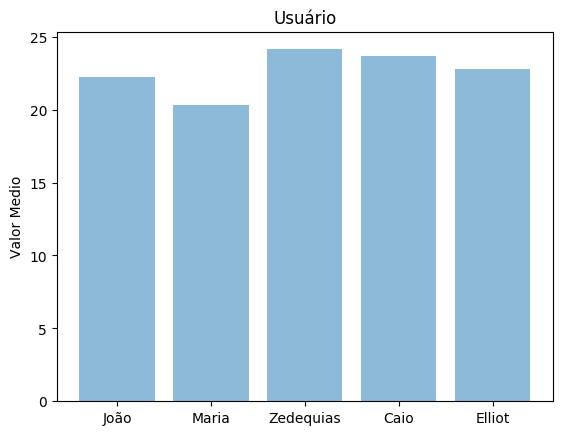

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(result.nome)
y_pos = np.arange(len(objects))
performance = list(result.media)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor Medio')
plt.title('Usuário')
 
plt.show()

References

## Relatório 3

### Objetivo: Obtenção da quantidade de usuário por estado

codigo para obtenção do resultado:

In [0]:
result = pd.read_sql_query("""
                            select estado, count(*) as quantidade from endereco
                            inner join usuario on (endereco.id_endereco = usuario.endereco_id_fk)
                            group by estado
                            """,conn)

In [11]:
result

,estado,quantidade
0,SP,5
1,AM,2
2,AP,3
3,ES,60
4,MT,2
5,SC,5
6,RS,7
7,CE,3
8,MG,11
9,AC,7


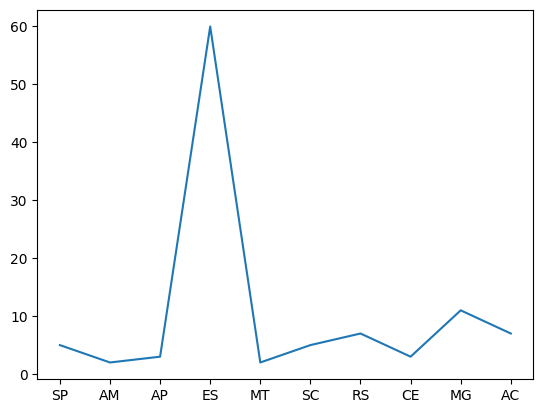

In [12]:
import matplotlib.pyplot as plt
plt.plot(result.estado, result.quantidade)

## Relatório 4

### Objetivo: Obter a variação do preço de um mesmo produto em compras diferentes

codigo para obtenção do resultado:

In [0]:
result = pd.read_sql_query("""
                            select pm.nome, sum(pc.preco) as preco from produto_compra as pc
                            inner join produto_unid as pu on (pc.cod_produto_fk = pu.codigo)
                            inner join produto_marca as pm on (pu.codigo = pm.codigo)
                            group by pm.nome, pc.preco;
                            """,conn)

In [14]:
result

,nome,preco
0,Arroz,$1.00
1,Arroz,$2.00
2,Arroz,$6.99
3,Arroz,$17.99
4,Arroz,$18.00
5,Arroz,$23.00
6,Arroz,$54.00
7,Arroz,$36.00
8,Arroz,$39.00
9,Arroz,$42.00


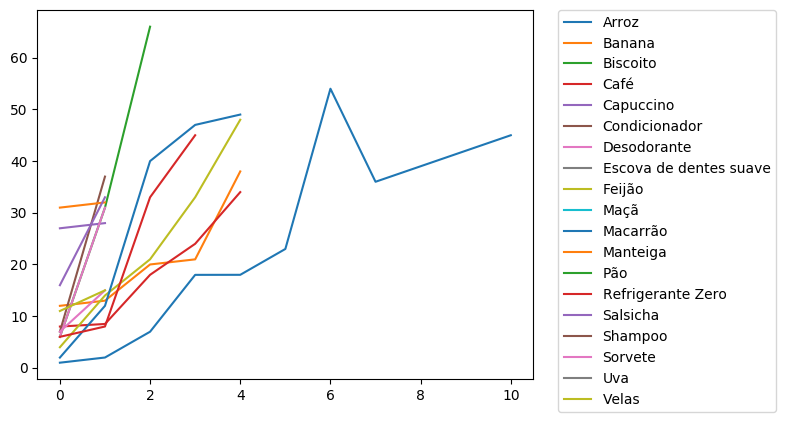

In [15]:
df = pd.DataFrame(result)

n = {}
for i, j in df.itertuples(index=False):
  if i not in n:
    n[i] = [float(j[1:])]
  else:
    n[i].append(float(j[1:]))

for key in n:
  plt.plot(n[key], label=key)
  
#plt.rc('ytick', labelsize=6) 
#plt.rc('xtick', labelsize=10) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## **Relatório5**

### Objetivo: Marcas mais compradas pelos usuários (exceto hortifruti)

In [0]:
result = pd.read_sql_query("""
                            select nome, marca, count(cod_produto_fk) as qtd_compra from produto_marca as prod inner join produto_estoque as est
                            on (prod.codigo=est.cod_produto_fk)
                            where marca is not null
                            group by marca, nome
                            order by qtd_compra desc
                            """,conn)

In [17]:
result


,nome,marca,qtd_compra
0,Refrigerante Zero,Coca-cola,6
1,Macarrão,Renata,5
2,Capuccino,Três Corações,5
3,Velas,São Domingos,4
4,Arroz,Vietnamita,4
5,Sorvete,Kibom,3
6,Arroz,Sepé,3
7,Pão,Padaria xD,3
8,Salsicha,Perdigão,3
9,Feijão,Combrasil,3


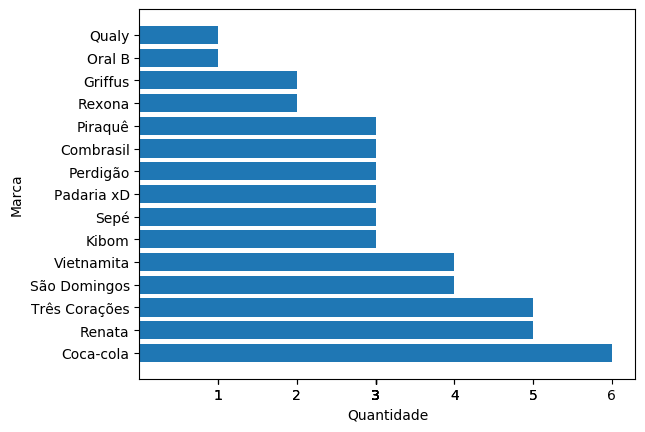

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(result.qtd_compra)
y_pos = np.arange(len(objects))
performance = list(result.marca)
 
plt.barh(performance, objects)
plt.xticks(objects)
plt.xlabel('Quantidade')
plt.ylabel('Marca')
 
plt.show()